In [2]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
import requests
from bs4 import BeautifulSoup
base_url = 'https://www.mobile01.com/topiclist.php?f=291&p='

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}



In [4]:
import time
url = base_url + '1'
res = requests.get(url , headers = headers)

soup = BeautifulSoup(res.text , 'lxml')
titles = soup.find_all(class_ = 'topic_gen')
popular = soup.find_all(class_ = 'topic_gen.title')
all_title = []
for title in titles:
    all_title.append(title.text)
replies = soup.find_all(class_  ='reply')
authors = soup.find_all(class_ = 'authur')
last_rep = soup.find_all(class_="latestreply")
all_reply = []
all_author = []
all_re = []
for reply in replies:
    all_reply.append(reply.text)
for author in authors:
    all_author.append(author.text)
for re in last_rep:
    all_re.append(re.text)
df = [all_title[1:] , all_reply[1:] , all_author[1:] ,all_re[1:]]
df = pd.DataFrame(df).T
colnames = ['title', 'res_num' , 'author' , 'last_res']
df.columns = colnames
data = df
data.head()
for i in range(2,4):
    url = base_url + str(i)
    res = requests.get(url , headers = headers)

    soup = BeautifulSoup(res.text , 'lxml')
    titles = soup.find_all(class_ = 'topic_gen')
    popular = soup.find_all(class_ = 'topic_gen.title')
    all_title = []
    for title in titles:
        all_title.append(title.text)
    replies = soup.find_all(class_  ='reply')
    authors = soup.find_all(class_ = 'authur')
    last_rep = soup.find_all(class_="latestreply")
    all_reply = []
    all_author = []
    all_re = []
    for reply in replies:
        all_reply.append(reply.text)
    for author in authors:
        all_author.append(author.text)
    for re in last_rep:
        all_re.append(re.text)
    df = [all_title[1:] , all_reply[1:] , all_author[1:] ,all_re[1:]]
    df = pd.DataFrame(df).T
    colnames = ['title', 'res_num' , 'author' , 'last_res']
    df.columns = colnames
    data.append(df)
    time.sleep(10)
data.head()

,title,res_num,author,last_res
0,107年10月【如果認為會影響獲利請勿進入觀看】空頭分流,470,2019-04-23 15:02Mobile01系統服務員,2019-07-04 08:59weber2654
1,達成財務自由之後的生活點滴,"12,957",2015-05-04 08:57weber2654,2019-07-04 09:35Macquarie150
2,2107 厚生 信義琢白建案,"25,318",2014-07-31 13:47sheng_258520,2019-07-04 09:34lsd193anthon
3,尹衍樑：潤泰雙雄明年配息 一定滿意,"22,098",2017-01-01 00:36jiangbruce888,2019-07-04 09:32公路車ing
4,最新 !!! 美中貿談結束 美擬向所有陸輸美商品加徵關稅 ...,289,2019-06-20 09:10shih3246,2019-07-04 09:30老阿公


In [ ]:
data[data.title.str.find('險')>0]

In [14]:
for title in titles:
    print(title)
t = soup.find_all('a').find('title')
t

<a class="topic_gen" href="topicdetail.php?f=291&amp;t=5741999" title="人氣: 946">關於領股東會紀念品一些問題</a>
<a class="topic_gen" href="topicdetail.php?f=291&amp;t=5256240" title="人氣: 162929">『生技股』是未來１０年的大主流，你不要懷疑！</a>
<a class="topic_gen" href="topicdetail.php?f=291&amp;t=5680214" title="人氣: 8932">郭董所說的:民主不能當飯吃</a>
<a class="topic_gen" href="topicdetail.php?f=291&amp;t=5722683" title="人氣: 6237">都更容積獎勵 最高30%</a>
<a class="topic_gen" href="topicdetail.php?f=291&amp;t=5742045" title="人氣: 946">未來十年  一定要懂的投資？</a>
<a class="topic_gen" href="topicdetail.php?f=291&amp;t=5741974" title="人氣: 748">這問題有人問過，但我還是不太懂，關於交割銀行</a>
<a class="topic_gen" href="topicdetail.php?f=291&amp;t=4912469" title="人氣: 1925258">尹衍樑：潤泰雙雄明年配息 一定滿意</a>
<a class="topic_gen" href="topicdetail.php?f=291&amp;t=5738897" title="人氣: 3179">富邦VIX 買賣時 交易費用問題</a>
<a class="topic_gen" href="topicdetail.php?f=291&amp;t=5028989" title="人氣: 7200773">107年10月【如果認為會影響獲利請勿進入觀看】空頭分流</a>
<a class="topic_gen" href="topicdetail.php?f=291&amp;t=5041062" 

AttributeError: ResultSet object has no attribute 'find'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [3]:
data = pd.read_csv('/Users/Dennis/Downloads/Pydsci-master/Python_book/4Describe/sndHsPr.csv')
data.price.agg(['mean', 'median' , 'std'])

mean      61151.810919
median    57473.000000
std       22293.358147
Name: price, dtype: float64

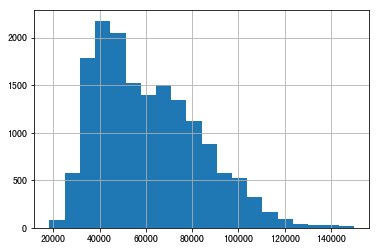

In [5]:
data.price.hist(bins =20)

In [12]:
data.price.var()
normal = pd.Series(np.random.randn(1000)  , name = 'normal')
normal.skew()
normal.kurtosis()

0.004320225546440515

In [34]:
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
x.DESCR.splitlines()

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

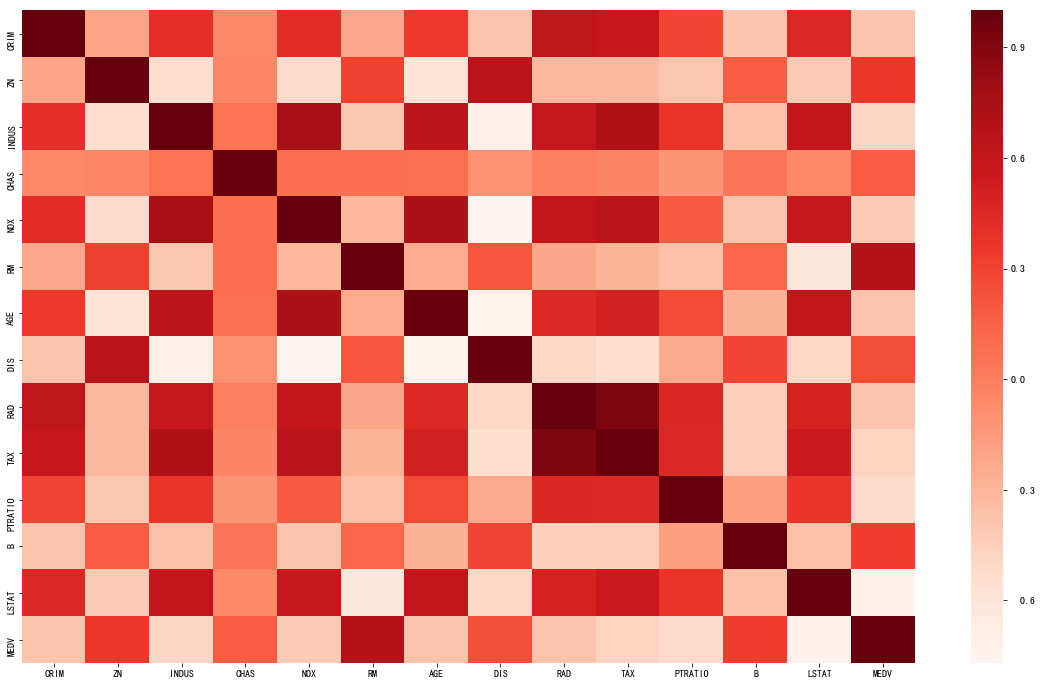

In [39]:
plt.figure(figsize = (20,12))
cor_X = df.corr()
sns.heatmap(cor_X , cmap= plt.cm.Reds)
plt.show()

In [66]:
target_feature = abs(cor_X['MEDV'])

relevalant_feature = target_feature[target_feature > 0.5]
relevalant_feature

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [67]:
df[['RM' ,'LSTAT' ]].corr()

,RM,LSTAT
RM,1.000000,-0.613808
LSTAT,-0.613808,1.000000


In [68]:
X_1 = sm.add_constant(X)

model = sm.OLS(Y , X_1).fit()
model.pvalues

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

In [78]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [81]:
cols = list(X.columns)
pmax = 1
while (len(cols)) > 0:
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y , X_1 ).fit()
    p = pd.Series(model.pvalues.values[1:] ,index=cols )
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if pmax > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break
        
select_feature_BE = cols
print(select_feature_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [82]:
model = LinearRegression()
rfe = RFE(model ,7) # Recursive feature eliminator
rfe_x = rfe.fit_transform(X,Y)
model.fit(rfe_x , Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True  True False  True False
  True]
[2 4 3 1 1 1 7 1 1 5 1 6 1]


In [ ]:
from sklearn.preprocessing import MinMaxScaler